<a href="https://colab.research.google.com/github/itisWasp/vsit-rwanda-sentiment/blob/main/visit_rwanda_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #VisitRwanda Sentiment Analysis

## 1.Authenticate to Twitter

In [ ]:
import pandas as pd
import numpy as np
import tweepy as tw
import matplotlib.pyplot as plt

In [ ]:
#Twitter API connection
consumer_key = 'ZUJtVbQsnlhjwPppB96Iy1zXn'
consumer_secret = 'xK2BdKbAP0o6KqLGrXRzJdfmOpOf4XaKhGhFfEs7MBiBj9ctQK'
access_token = '1437342555151249408-NSpHFFQF3m2fDEXwMg0pyUXOOBr0J4'
access_token_secret ='0rheoIeGWe8ICV6fL3NKljDom7g8fCZyt4JnAjwBPvAzc'

In [ ]:
#Authenticate credentials
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## 2.Get Tweets

In [ ]:
hashtag='#visitrwanda'
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets': tweet.text, 'TimeStamp': tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'Love love the fact that we have great staycations in kigali … serene , spacious, amazing services .. fully furnishe… https://t.co/u4JPVVF5aL', 'TimeStamp': datetime.datetime(2021, 10, 18, 10, 6, 35)}, {'Tweets': 'Rwanda Gorilla Tours from South Africa\nhttps://t.co/3Pg5Ic9CBG\nEmail: kabirasafaris@gmail.com \n#VisitRwanda… https://t.co/im5g9rTrpp', 'TimeStamp': datetime.datetime(2021, 10, 18, 10, 1, 5)}, {'Tweets': 'RT @Vbiruta: Ambiance électrique avec le panneau #VisitRwanda au Parc des Princes au lendemain de @Kwitaizina avec participation de @neymar…', 'TimeStamp': datetime.datetime(2021, 10, 18, 9, 58, 53)}, {'Tweets': 'RT @Vbiruta: Content d’avoir pu assister au match du #PSG-Montpellier ce 25 Septembre au Parc des Princes, et d’avoir échangé avec des memb…', 'TimeStamp': datetime.datetime(2021, 10, 18, 9, 58, 44)}, {'Tweets': '#RadissonBlu #RadissonBluKigali #MICE\n#kigaliconventioncentre #Rwanda #Kigali #VisitRwanda #Staysafe #Travelsafe… https://t.co/hGqXuJa9Eb', 

In [ ]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,TimeStamp
0,Love love the fact that we have great staycati...,2021-10-18 10:06:35
1,Rwanda Gorilla Tours from South Africa\nhttps:...,2021-10-18 10:01:05
2,RT @Vbiruta: Ambiance électrique avec le panne...,2021-10-18 09:58:53
3,RT @Vbiruta: Content d’avoir pu assister au ma...,2021-10-18 09:58:44
4,#RadissonBlu #RadissonBluKigali #MICE\n#kigali...,2021-10-18 09:54:39


In [ ]:
kivu_refs = ['Kivu', 'Lake Kivu', 'kivu','LakeKivu', 'lakekivu']
gorilla_refs = ['Gorillas', 'gorilla', 'Volcanoes National Park', 'volcanoes national park']
akagera_refs = ['Akagera National Park', 'akagera national park', 'akageranationalpark']
kigali_refs = ['Kigali City', 'KigaliCity', 'kigali city', 'kigalicity']
psg_refs = ['PSG','psg']
arsenal_refs = ['Arsenal','arsenal']

In [ ]:
def identity(tweet, refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

df['Kivu'] = df['Tweets'].apply(lambda x: identity(x, kivu_refs))
df['Gorillas'] = df['Tweets'].apply(lambda x: identity(x, gorilla_refs))
df['Akagera'] = df['Tweets'].apply(lambda x: identity(x, akagera_refs))
df['PSG'] = df['Tweets'].apply(lambda x: identity(x, psg_refs))
df['Arsenal'] = df['Tweets'].apply(lambda x: identity(x, arsenal_refs))

df.head()

,Tweets,TimeStamp,Kivu,Gorillas,Akagera,PSG,Arsenal
0,Love love the fact that we have great staycati...,2021-10-18 10:06:35,0,0,0,0,0
1,Rwanda Gorilla Tours from South Africa\nhttps:...,2021-10-18 10:01:05,0,0,0,0,0
2,RT @Vbiruta: Ambiance électrique avec le panne...,2021-10-18 09:58:53,0,0,0,0,0
3,RT @Vbiruta: Content d’avoir pu assister au ma...,2021-10-18 09:58:44,0,0,0,1,0
4,#RadissonBlu #RadissonBluKigali #MICE\n#kigali...,2021-10-18 09:54:39,0,0,0,0,0


## 3.Preprocess

In [ ]:
#import stopwords
import nltk
from nltk.corpus import stopwords

#import textblob
from textblob import Word, TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#VisitRwanda']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
  preprocessed_tweet = tweet
  preprocessed_tweet.replace('[^\w\s]', '')
  preprocessed_tweet = ' '.join(word for word in preprocessed_tweet.split() if word not in stop_words)
  preprocessed_tweet = ' '.join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
  preprocessed_tweet = ' '.join(Word(word).lemmatize() for word in preprocessed_tweet.split())

  return (preprocessed_tweet)

df['Preprocessed Tweets'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,TimeStamp,Kivu,Gorillas,Akagera,PSG,Arsenal,Preprocessed Tweets
0,Love love the fact that we have great staycati...,2021-10-18 10:06:35,0,0,0,0,0,Love love fact great staycations kigali … sere...
1,Rwanda Gorilla Tours from South Africa\nhttps:...,2021-10-18 10:01:05,0,0,0,0,0,Rwanda Gorilla Tours South Africa https://t.co...
2,RT @Vbiruta: Ambiance électrique avec le panne...,2021-10-18 09:58:53,0,0,0,0,0,@Vbiruta: Ambiance électrique avec le panneau ...
3,RT @Vbiruta: Content d’avoir pu assister au ma...,2021-10-18 09:58:44,0,0,0,1,0,@Vbiruta: Content d’avoir pu assister au match...
4,#RadissonBlu #RadissonBluKigali #MICE\n#kigali...,2021-10-18 09:54:39,0,0,0,0,0,#RadissonBlu #RadissonBluKigali #MICE #kigalic...


## 4.Calculate Sentiment

In [ ]:
df['Polarity'] = df['Preprocessed Tweets'].apply(lambda x: TextBlob(x).sentiment[0])
df['Subjectivity'] = df['Preprocessed Tweets'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

,Tweets,TimeStamp,Kivu,Gorillas,Akagera,PSG,Arsenal,Preprocessed Tweets,Polarity,Subjectivity
0,Love love the fact that we have great staycati...,2021-10-18 10:06:35,0,0,0,0,0,Love love fact great staycations kigali … sere...,0.6,0.7125
1,Rwanda Gorilla Tours from South Africa\nhttps:...,2021-10-18 10:01:05,0,0,0,0,0,Rwanda Gorilla Tours South Africa https://t.co...,0.0,0.0000
2,RT @Vbiruta: Ambiance électrique avec le panne...,2021-10-18 09:58:53,0,0,0,0,0,@Vbiruta: Ambiance électrique avec le panneau ...,0.0,0.0000
3,RT @Vbiruta: Content d’avoir pu assister au ma...,2021-10-18 09:58:44,0,0,0,1,0,@Vbiruta: Content d’avoir pu assister au match...,0.0,0.0000
4,#RadissonBlu #RadissonBluKigali #MICE\n#kigali...,2021-10-18 09:54:39,0,0,0,0,0,#RadissonBlu #RadissonBluKigali #MICE #kigalic...,0.0,0.0000


In [ ]:
df[df['Gorillas'] == 1][['Gorillas', 'Polarity', 'Subjectivity']].groupby('Gorillas').agg([np.mean, np.max, np.median])

Polarity              Subjectivity            
             mean  amax median         mean amax median
Gorillas                                               
1         0.07125  0.85    0.0     0.161984  1.0    0.0

In [ ]:
df[df['Kivu'] == 1][['Kivu', 'Polarity', 'Subjectivity']].groupby('Kivu').agg([np.mean, np.max, np.median])

Polarity                Subjectivity            
          mean amax    median         mean amax median
Kivu                                                  
1     0.397415  0.8  0.483333     0.634005  1.0  0.775

In [ ]:
df[df['Akagera'] == 1][['Akagera', 'Polarity', 'Subjectivity']].groupby('Akagera').agg([np.mean, np.max, np.median])

Polarity                     Subjectivity               
             mean      amax    median         mean amax    median
Akagera                                                          
1       -0.083523  0.272727 -0.235714     0.470833  1.0  0.271429

In [ ]:
df[df['PSG'] == 1][['PSG', 'Polarity', 'Subjectivity']].groupby('PSG').agg([np.mean, np.max, np.median])

Polarity             Subjectivity            
        mean amax median         mean amax median
PSG                                              
1        0.0  0.0    0.0          0.0  0.0    0.0

In [ ]:
df[df['Arsenal'] == 1][['Arsenal', 'Polarity', 'Subjectivity']].groupby('Arsenal').agg([np.mean, np.max, np.median])

Polarity                  Subjectivity                 
             mean      amax median         mean      amax median
Arsenal                                                         
1        0.022556  0.142857    0.0     0.050188  0.317857    0.0

## 5.**Visualize** 

In [ ]:
kivu = df[df['Kivu'] == 1][['TimeStamp', 'Polarity']]
kivu = kivu.sort_values(by='TimeStamp', ascending=True)
kivu['MA Polarity'] = kivu.Polarity.rolling(10, min_periods=3).mean()

gorillas = df[df['Gorillas'] == 1][['TimeStamp', 'Polarity']]
gorillas = gorillas.sort_values(by='TimeStamp', ascending=True)
gorillas['MA Polarity'] = gorillas.Polarity.rolling(10, min_periods=3).mean()

akagera = df[df['Akagera'] == 1][['TimeStamp', 'Polarity']]
akagera = akagera.sort_values(by='TimeStamp', ascending=True)
akagera['MA Polarity'] = akagera.Polarity.rolling(10, min_periods=3).mean()

psg = df[df['PSG'] == 1][['TimeStamp', 'Polarity']]
psg = psg.sort_values(by='TimeStamp', ascending=True)
psg['MA Polarity'] = psg.Polarity.rolling(10, min_periods=3).mean()

arsenal = df[df['Arsenal'] == 1][['TimeStamp', 'Polarity']]
arsenal = arsenal.sort_values(by='TimeStamp', ascending=True)
arsenal['MA Polarity'] = arsenal.Polarity.rolling(10, min_periods=3).mean()

arsenal.head()

,TimeStamp,Polarity,MA Polarity
908,2021-10-13 13:42:21,0.000000,NaN
863,2021-10-13 18:19:54,0.142857,NaN
859,2021-10-13 18:25:33,0.142857,0.095238
857,2021-10-13 18:29:40,0.142857,0.107143
739,2021-10-14 10:01:23,0.000000,0.085714


Text(0.5, 0.98, 'Visit Rwanda Sentiment Analysis')

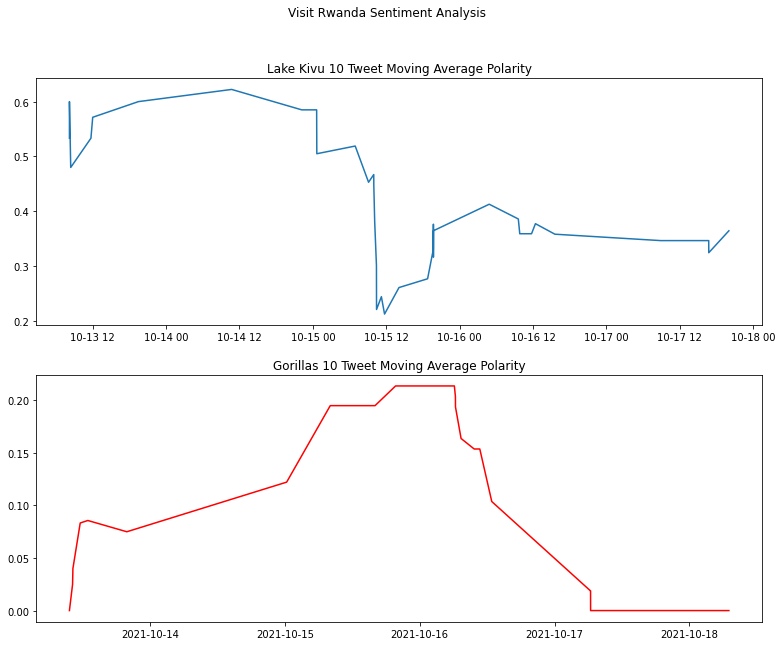

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
axes[0].plot(kivu['TimeStamp'], kivu['MA Polarity'])
axes[0].set_title('\n'.join(['Lake Kivu 10 Tweet Moving Average Polarity']))

axes[1].plot(gorillas['TimeStamp'], gorillas['MA Polarity'], color='red')
axes[1].set_title('\n'.join(['Gorillas 10 Tweet Moving Average Polarity']))

fig.suptitle('\n'.join(['Visit Rwanda Sentiment Analysis']), y=0.98)

Text(0.5, 1.0, 'Gorillas 10 Tweet Moving Average Polarity')

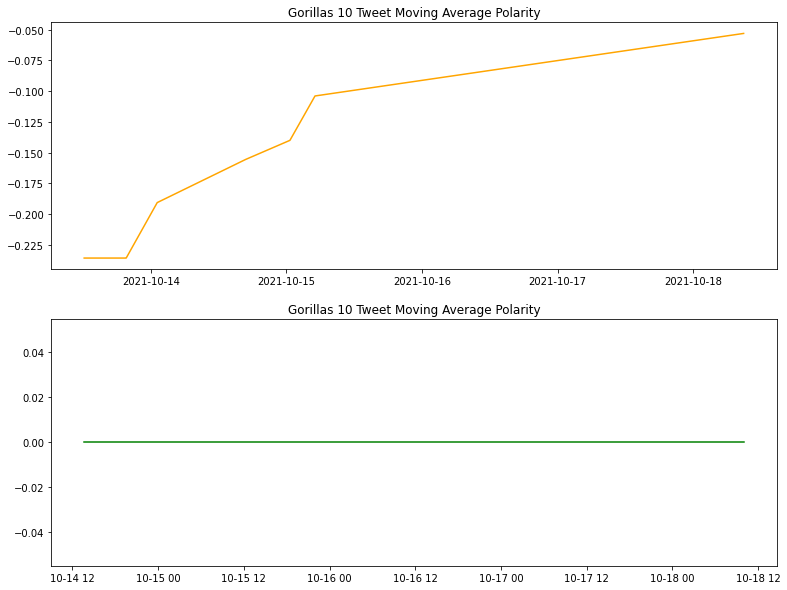

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
axes[0].plot(akagera['TimeStamp'], akagera['MA Polarity'], color='orange')
axes[0].set_title('\n'.join(['Gorillas 10 Tweet Moving Average Polarity']))

axes[1].plot(psg['TimeStamp'], psg['MA Polarity'], color='green')
axes[1].set_title('\n'.join(['Gorillas 10 Tweet Moving Average Polarity']))

Text(0.5, 1.0, 'Gorillas 10 Tweet Moving Average Polarity')

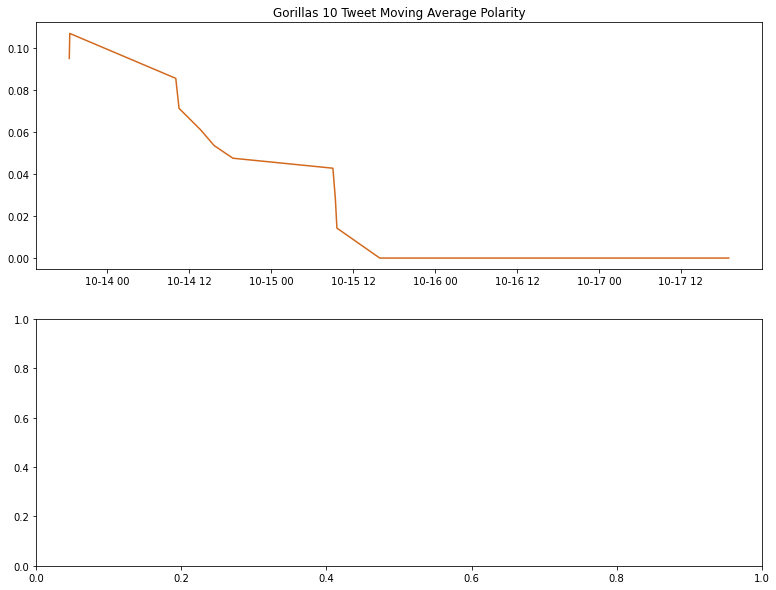

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
axes[0].plot(arsenal['TimeStamp'], arsenal['MA Polarity'], color='chocolate')
axes[0].set_title('\n'.join(['Gorillas 10 Tweet Moving Average Polarity']))